# Introduction


In this project, we will apply K-Means clustering to address the following questions:

- Which regions have similar average rice prices across a given period?
- How do rice types (e.g., regular milled vs superior milled) cluster based on pricing?
- Can we group markets based on how they price different rice types?

Additionally, we will answer the following questions through time series and descriptive analysis:

- How has the price of rice changed in different regions over time?
- Which regions experience the most volatile rice prices?
- Is there an existing seasonal pattern in rice price volatility?

The [dataset](https://data.humdata.org/dataset/wfp-food-prices-for-philippines), sourced from the World Food Programme Price Database, offers an in-depth look at food prices in the Philippines. Covering key staples such as maize, rice, beans, fish, and sugar, it serves as a valuable tool for analyzing the dynamics of the nation’s food economy.

| **Column Name** | **Description**                                                                                                |
| --------------- | -------------------------------------------------------------------------------------------------------------- |
| `date`          | The date when the food price was recorded. Helps track trends over time.                                       |
| `admin1`        | The first-level administrative region (e.g., province or region like "Metro Manila").                          |
| `admin2`        | The second-level administrative region (e.g., city or municipality within a province).                         |
| `market`        | The name of the specific market where the price was observed.                                                  |
| `latitude`      | Geographic latitude of the market. Useful for mapping and regional analysis.                                   |
| `longitude`     | Geographic longitude of the market.                                                                            |
| `category`      | Broad classification of the food (e.g., cereals, meats, legumes).                                              |
| `commodity`     | Specific food item being priced (e.g., "Rice (local)", "Sugar", "Tilapia").                                    |
| `unit`          | The unit of measurement for the price (e.g., "kg", "piece", "liter").                                          |
| `priceflag`     | Indicates how the price was obtained: `"actual"` (directly recorded) or `"aggregate"` (averaged or estimated). |
| `pricetype`     | Type of market price: typically `"retail"` or `"wholesale"`.                                                   |
| `currency`      | Currency in which the price is reported — usually `"Philippine Peso"`.                                         |
| `price`         | The reported price of the commodity in the local currency and unit.                                            |
| `usdprice`      | The same price converted to USD (based on exchange rates at the time).                                         |


In [349]:
import pandas as pd

pd.set_option('display.max_columns', 500)
food_prices_data = pd.read_csv("wfp_food_prices_phl.csv", skiprows=[1])

1 row containing the metadata for each column was skipped when reading the dataset


# Data Cleaning and Exploration


In [350]:
# Number of data and features 
print(food_prices_data.shape)
print(len(str(food_prices_data.shape))*'-')

# Check how many types of data are in the dataset
print(food_prices_data.dtypes.value_counts())
print(len(str(food_prices_data.shape))*'-')

# Check the first 16 columns
food_prices_data.head(16)


(198764, 16)
------------
object     10
float64     4
int64       2
Name: count, dtype: int64
------------


,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
0,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,cereals and tubers,Maize flour (yellow),573,KG,actual,Retail,PHP,15.00,0.37
1,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,cereals and tubers,"Rice (milled, superior)",593,KG,actual,Retail,PHP,20.00,0.49
2,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,cereals and tubers,"Rice (milled, superior)",593,KG,actual,Wholesale,PHP,18.35,0.45
3,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,cereals and tubers,"Rice (regular, milled)",80,KG,actual,Retail,PHP,18.00,0.44
4,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,cereals and tubers,"Rice (regular, milled)",80,KG,actual,Wholesale,PHP,16.35,0.40
5,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,14.60,120.98,"meat, fish and eggs",Meat (pork),140,KG,actual,Retail,PHP,105.37,2.60
6,2000-01-15,Region III,Nueva Ecija,Palayan,171,15.54,121.08,cereals and tubers,"Rice (milled, superior)",593,KG,actual,Retail,PHP,19.00,0.47
7,2000-01-15,Region III,Nueva Ecija,Palayan,171,15.54,121.08,cereals and tubers,"Rice (milled, superior)",593,KG,actual,Wholesale,PHP,18.00,0.44
8,2000-01-15,Region III,Nueva Ecija,Palayan,171,15.54,121.08,cereals and tubers,"Rice (regular, milled)",80,KG,actual,Retail,PHP,18.10,0.45
9,2000-01-15,Region III,Nueva Ecija,Palayan,171,15.54,121.08,"meat, fish and eggs",Meat (pork),140,KG,actual,Retail,PHP,77.00,1.90


In [351]:
# Check The amount of regions recorded
for region in food_prices_data['admin1'].unique():
    print(region)


print(f"TOTAL REGION: {food_prices_data['admin1'].nunique()}")

National Capital region
Region III
Region IX
Region VI
Region VII
Region XI
Region XII
Autonomous region in Muslim Mindanao
Cordillera Administrative region
Region I
Region II
Region IV-A
Region IV-B
Region V
Region VIII
Region X
Region XIII
TOTAL REGION: 17


### Check for Missing Values


In [352]:
food_prices_data.isnull().sum()

date            0
admin1          0
admin2          0
market          0
market_id       0
latitude        0
longitude       0
category        0
commodity       0
commodity_id    0
unit            0
priceflag       0
pricetype       0
currency        0
price           0
usdprice        0
dtype: int64

### Check Column Values


In [353]:
commodity_counts = food_prices_data["commodity"].value_counts().reset_index()
commodity_counts.columns = ["commodity", "count"]
print(commodity_counts.to_string(index=False))

                          commodity  count
             Rice (regular, milled)   8781
                        Meat (pork)   7052
                           Tomatoes   6566
                            Carrots   6530
                            Cabbage   6344
      Meat (beef, chops with bones)   6029
              Meat (chicken, whole)   5857
                       Onions (red)   5737
                               Eggs   5638
                   Potatoes (Irish)   5435
                 Rice (well milled)   4838
                          Eggplants   4833
                    Fish (milkfish)   4630
                       Bitter melon   4584
                     Rice (special)   4523
                   Fish (roundscad)   4433
                            Coconut   4338
            Meat (pork, with bones)   4322
                     Fish (tilapia)   4195
                        Meat (beef)   4037
                       Beans (mung)   4035
                  Bananas (lakatan)   3941
           

In [354]:
food_prices_data["currency"].value_counts()

currency
PHP    198764
Name: count, dtype: int64

### Filter Unnecessary Data


In [355]:
food_prices_data = food_prices_data.drop(columns=["category", "currency", "latitude", "longitude"])
food_prices_data.head()

,date,admin1,admin2,market,market_id,commodity,commodity_id,unit,priceflag,pricetype,price,usdprice
0,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,Maize flour (yellow),573,KG,actual,Retail,15.00,0.37
1,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (milled, superior)",593,KG,actual,Retail,20.00,0.49
2,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (milled, superior)",593,KG,actual,Wholesale,18.35,0.45
3,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (regular, milled)",80,KG,actual,Retail,18.00,0.44
4,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (regular, milled)",80,KG,actual,Wholesale,16.35,0.40


Since we will only be focusing on rice prices, the category column is unnecessary because we will only have 1 category. Currency will also be removed since all valUes in price column are in PHP


### Change Data Types


Convert price, latitude, and longitude to numbers, and date to datetime format. Invalid entries are safely turned into NaN or NaT using errors="coerce".


In [356]:
food_prices_data["price"] = pd.to_numeric(food_prices_data["price"], errors="coerce")
# food_prices_data["latitude"] = pd.to_numeric(food_prices_data["latitude"], errors="coerce")
# food_prices_data["longitude"] = pd.to_numeric(food_prices_data["longitude"], errors="coerce")
food_prices_data["date"] = pd.to_datetime(food_prices_data["date"], errors="coerce")

print(food_prices_data.dtypes.value_counts())

object            7
int64             2
float64           2
datetime64[ns]    1
Name: count, dtype: int64


### Filter Rice From Commodities


In [357]:
all_rice_df = food_prices_data[food_prices_data["commodity"].str.startswith("Rice", na=False)]

all_rice_df["commodity"].value_counts()



commodity
Rice (regular, milled)     8781
Rice (well milled)         4838
Rice (special)             4523
Rice (milled, superior)    2850
Rice (paddy)                664
Rice (premium)              620
Name: count, dtype: int64

Since we only need rice commodities, we need to filter out all data that aren't rice


In [358]:
all_rice_df = all_rice_df[(all_rice_df['date'] >= '2015-01-01') & (all_rice_df['date'] <= '2025-12-31')]

all_rice_df.shape

(16990, 12)

All data entries must be between 2015 - 2025


In [359]:
all_rice_df["admin1"].value_counts()


admin1
Region III                              1475
Region VI                               1335
Region V                                1210
Region VIII                             1166
Region XI                               1116
Cordillera Administrative region        1081
Region IV-A                             1040
Region X                                1009
Region IV-B                              995
Region XIII                              978
Region XII                               959
Region VII                               958
Autonomous region in Muslim Mindanao     848
Region II                                831
Region I                                 825
Region IX                                747
National Capital region                  417
Name: count, dtype: int64

In [360]:
all_rice_df["admin2"].value_counts()


admin2
Davao del Sur          655
Iloilo                 456
South Cotabato         425
Cebu                   423
Metropolitan Manila    417
                      ... 
Ifugao                 134
Sarangani              133
Compostela Valley      130
Sulu                    67
Camarines Sur           18
Name: count, Length: 79, dtype: int64

In [361]:
all_rice_df["market"].value_counts()

market
Metro Manila           417
Davao City             390
Iloilo City            279
Cebu City              258
Koronadal              241
                      ... 
Cagayan de Oro City     31
Tacloban City           30
San Fernando City       29
Calapan City            19
Naga City               18
Name: count, Length: 108, dtype: int64

In [362]:
all_rice_df["pricetype"].value_counts()

pricetype
Retail       16081
Wholesale      909
Name: count, dtype: int64

In [363]:
all_rice_df["unit"].value_counts()

unit
KG    16990
Name: count, dtype: int64

In [364]:
all_rice_df["priceflag"].value_counts()

priceflag
actual              16374
aggregate             522
actual,aggregate       94
Name: count, dtype: int64

In [365]:
all_rice_df.head(30)

,date,admin1,admin2,market,market_id,commodity,commodity_id,unit,priceflag,pricetype,price,usdprice
19048,2015-01-15,Autonomous region in Muslim Mindanao,Maguindanao,Shariff Aguak,183,"Rice (regular, milled)",80,KG,actual,Retail,35.82,0.80
19060,2015-01-15,Cordillera Administrative region,Benguet,La Trinidad,168,"Rice (regular, milled)",80,KG,actual,Retail,40.80,0.91
19074,2015-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (milled, superior)",593,KG,actual,Retail,43.84,0.98
19075,2015-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (milled, superior)",593,KG,actual,Wholesale,39.90,0.89
19076,2015-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (regular, milled)",80,KG,actual,Retail,40.03,0.90
19077,2015-01-15,National Capital region,Metropolitan Manila,Metro Manila,167,"Rice (regular, milled)",80,KG,actual,Wholesale,34.80,0.78
19080,2015-01-15,Region I,Pangasinan,Lingayen,169,"Rice (regular, milled)",80,KG,actual,Retail,36.32,0.81
19093,2015-01-15,Region II,Cagayan,Tuguegarao City,170,"Rice (regular, milled)",80,KG,actual,Retail,35.85,0.80
19106,2015-01-15,Region III,Nueva Ecija,Palayan,171,"Rice (milled, superior)",593,KG,actual,Retail,44.31,0.99
19107,2015-01-15,Region III,Nueva Ecija,Palayan,171,"Rice (milled, superior)",593,KG,actual,Wholesale,40.27,0.90


# Data Analysis


In [366]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from scipy import stats
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import calendar
import matplotlib.cm as cm
import plotly.express as px

## Rice Price Volatility Across Philippine Regions (2015–2025)


In [367]:
def get_region_group(region):
    luzon = ['National Capital region', 'Region I', 'Region II', 'Region III', 'Region IV-A', 'Region IV-B', 'Region V', 'Cordillera Administrative region']
    visayas = ['Region VI', 'Region VII', 'Region VIII']
    mindanao = ['Region IX', 'Region X', 'Region XI', 'Region XII', 'Region XIII', 'Autonomous region in Muslim Mindanao']
    if region in luzon:
        return "Luzon"
    elif region in visayas:
        return "Visayas"
    elif region in mindanao:
        return "Mindanao"
    else:
        return ""


# Create a new column in the all_rice_df to specify which region group(Luzon, Visayas, Mindanao) it belongs to
all_rice_df["region_group"] = all_rice_df["admin1"].apply(get_region_group)

luzon_trends = all_rice_df.loc[all_rice_df["region_group"] == "Luzon"].groupby(["admin1", "date"])["price"].mean().reset_index()
visayas_trends = all_rice_df.loc[all_rice_df["region_group"] == "Visayas"].groupby(["admin1", "date"])["price"].mean().reset_index()
mindanao_trends = all_rice_df.loc[all_rice_df["region_group"] == "Mindanao"].groupby(["admin1", "date"])["price"].mean().reset_index()


### Luzon Trend


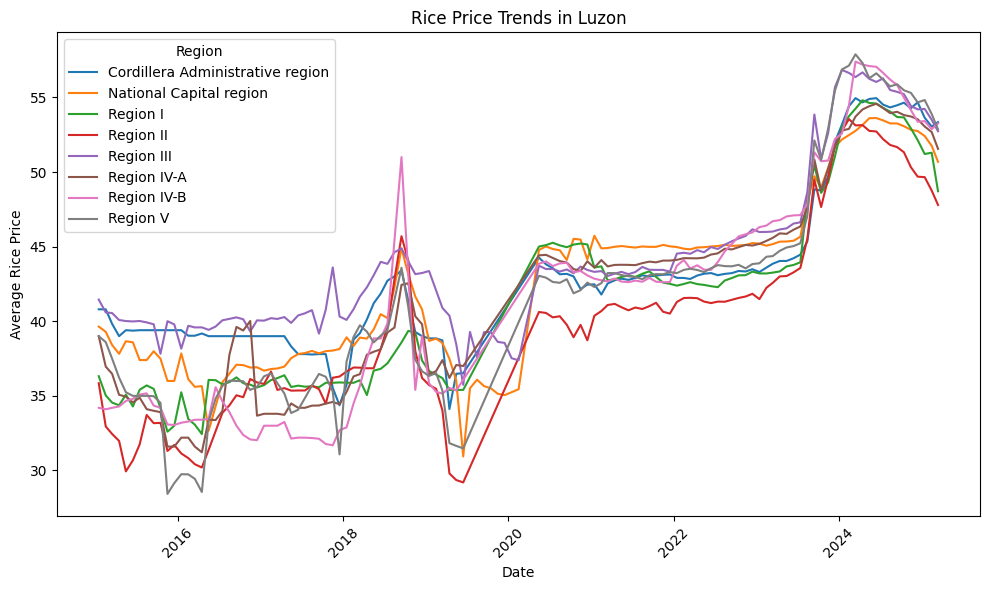

In [368]:
plt.figure(figsize=(10, 6))
for region in luzon_trends["admin1"].unique():
    region_data = luzon_trends[luzon_trends["admin1"] == region]
    plt.plot(region_data["date"], region_data["price"], label=region)
    

plt.xlabel("Date") 
plt.ylabel("Average Rice Price")   
plt.title("Rice Price Trends in Luzon")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.tight_layout()
plt.show()



### Visayas Trend


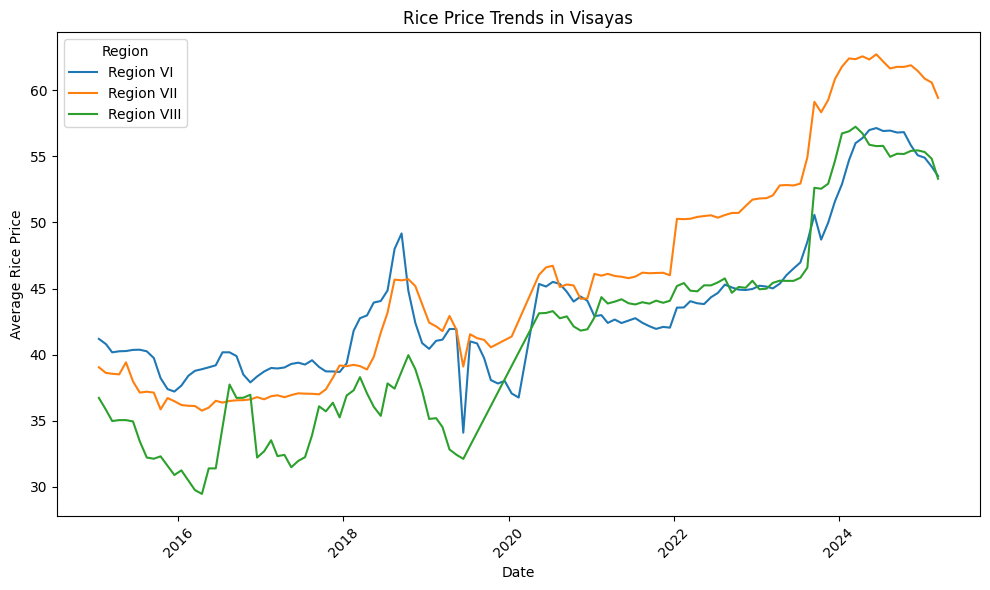

In [369]:
plt.figure(figsize=(10, 6))
for region in visayas_trends["admin1"].unique():
    region_data = visayas_trends[visayas_trends["admin1"] == region]
    plt.plot(region_data["date"], region_data["price"], label=region)
    

plt.xlabel("Date") 
plt.ylabel("Average Rice Price")   
plt.title("Rice Price Trends in Visayas")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.tight_layout()
plt.show()

### Mindanao Trend


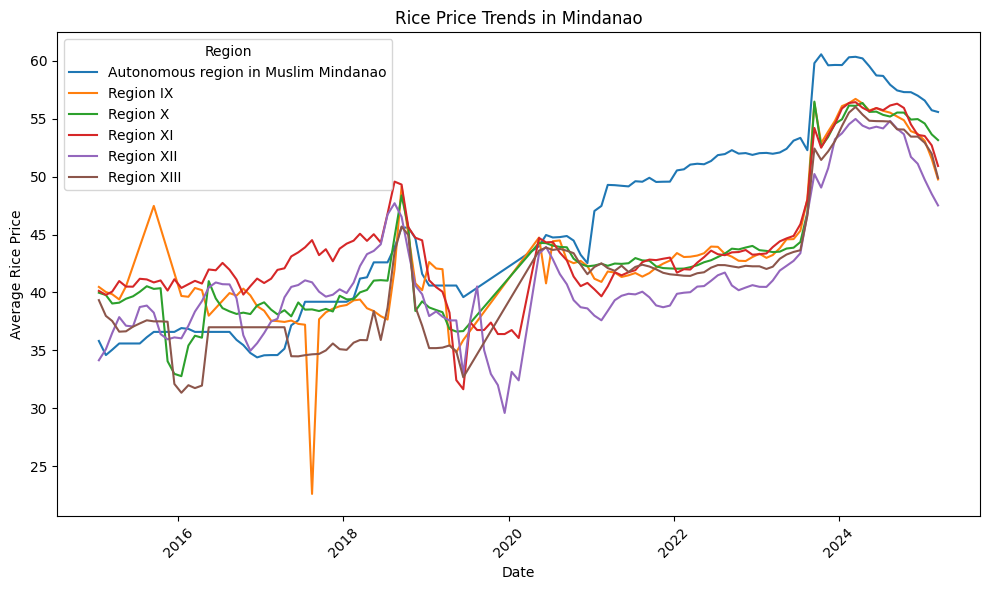

In [370]:
plt.figure(figsize=(10, 6))
for region in mindanao_trends["admin1"].unique():
    region_data = mindanao_trends[mindanao_trends["admin1"] == region]
    plt.plot(region_data["date"], region_data["price"], label=region)
    

plt.xlabel("Date") 
plt.ylabel("Average Rice Price")   
plt.title("Rice Price Trends in Mindanao")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.tight_layout()
plt.show()

## Regions with the most volatile rice prices


The steps to accomplish this task are as follows:

1. Aggregate average rice price per region per year
2. Normalize the data
3. Determine the number of clusters needed
4. Apply K-means clustering
5. Analyze and interpret the cluster


In [371]:
# aggregate_rice_df = all_rice_df.pivot_table(values=["price"] ) 

We must calculate the monthly averages for each region, then use standard deviation and coefficient of variation (CV) to determine the volatility of rice prices


In [372]:
# Calculate rice price per month
monthly_rice_price = all_rice_df.copy()
monthly_rice_price["year_month"] = monthly_rice_price["date"].dt.to_period("M")
monthly_avg_by_region = monthly_rice_price.groupby(["year_month", "admin1"])["price"].mean().reset_index()
monthly_avg_by_region['year_month'] = monthly_avg_by_region['year_month'].dt.to_timestamp() 

print(monthly_avg_by_region.head(17))

   year_month                                admin1    price
0  2015-01-01  Autonomous region in Muslim Mindanao  35.8200
1  2015-01-01      Cordillera Administrative region  40.8000
2  2015-01-01               National Capital region  39.6425
3  2015-01-01                              Region I  36.3200
4  2015-01-01                             Region II  35.8500
5  2015-01-01                            Region III  41.4500
6  2015-01-01                           Region IV-A  39.0000
7  2015-01-01                           Region IV-B  34.2000
8  2015-01-01                             Region IX  40.4800
9  2015-01-01                              Region V  39.0000
10 2015-01-01                             Region VI  41.1925
11 2015-01-01                            Region VII  39.0450
12 2015-01-01                           Region VIII  36.7300
13 2015-01-01                              Region X  39.9800
14 2015-01-01                             Region XI  40.1400
15 2015-01-01           

In [373]:
volatility_metrics = {}

In [374]:
def calculate_volatility(group):
    # Standard deviation
    std_dev = group['price'].std()
    
    # Coefficient of Variation (CV) = std_dev / mean
    mean_price = group['price'].mean()
    cv = std_dev / mean_price if mean_price > 0 else 0
    
    # Range (max - min) / mean
    price_range = group['price'].max() - group['price'].min()
    range_ratio = price_range / mean_price if mean_price > 0 else 0
    
    # Return a Series with metrics
    return pd.Series({
        'mean_price': mean_price,
        'std_dev': std_dev,
        'cv': cv, 
        'range_ratio': range_ratio,
        'count': len(group),
        'min_price': group['price'].min(),
        'max_price': group['price'].max()
    })


In [375]:
# Calculate volatility by Region
volatility_by_region = all_rice_df.groupby('admin1').apply(calculate_volatility).reset_index()
volatility_by_region = volatility_by_region.sort_values('cv', ascending=False)
print("Volatility By Region")
print(volatility_by_region.head(17).to_string(index=False))

Volatility By Region
                              admin1  mean_price   std_dev       cv  range_ratio  count  min_price  max_price
                          Region VII   49.231232 14.457639 0.293668     1.890670  958.0      31.42     124.50
Autonomous region in Muslim Mindanao   51.257700 10.327408 0.201480     1.264786  848.0      31.92      96.75
                           Region VI   46.149963  8.783685 0.190329     0.843771 1335.0      28.60      67.54
                         Region IV-B   46.426412  8.419563 0.181353     1.056941  995.0      27.86      76.93
                          Region III   46.812312  8.366355 0.178721     0.824783 1475.0      32.45      71.06
                           Region II   43.360385  7.485251 0.172629     0.730621  831.0      29.20      60.88
             National Capital region   42.012710  7.244619 0.172439     0.773337  417.0      28.97      61.46
                            Region I   45.368715  7.808248 0.172106     0.856758  825.0      32.44 

C:\Users\PREDATOR\AppData\Local\Temp\ipykernel_25556\2586062293.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  volatility_by_region = all_rice_df.groupby('admin1').apply(calculate_volatility).reset_index()


In [376]:
# Calculate volatility by Province
volatility_by_province = all_rice_df.groupby(['admin1', 'admin2']).apply(calculate_volatility).reset_index()
volatility_by_province = volatility_by_province.sort_values('cv', ascending=False)
print("Volatility By Province")
print(volatility_by_province.head(30).to_string(index=False))

Volatility By Province
                              admin1              admin2  mean_price   std_dev       cv  range_ratio  count  min_price  max_price
                          Region VII                Cebu   48.931939 20.033716 0.409420     1.902234  423.0      31.42     124.50
Autonomous region in Muslim Mindanao           Tawi-Tawi   57.245030 15.557617 0.271772     1.132500  165.0      31.92      96.75
                           Region VI             Antique   46.490734  9.432216 0.202884     0.741653  177.0      33.06      67.54
                          Region III              Aurora   48.798011  9.684337 0.198458     0.753104  181.0      34.31      71.06
                           Region VI               Capiz   46.748935  9.264552 0.198177     0.566430  169.0      36.05      62.53
                           Region VI              Iloilo   43.733750  8.542210 0.195323     0.854489  456.0      28.60      65.97
                           Region VI               Aklan   46.39497

C:\Users\PREDATOR\AppData\Local\Temp\ipykernel_25556\1652685541.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  volatility_by_province = all_rice_df.groupby(['admin1', 'admin2']).apply(calculate_volatility).reset_index()


Calculate the monthly data for the whole country


In [377]:
monthly_data = all_rice_df.copy()
monthly_data['month'] = monthly_data['date'].dt.month
monthly_data['year'] = monthly_data['date'].dt.year

# Calculate monthly average prices
monthly_avg = monthly_data.groupby(['year', 'month'])['price'].agg(['mean', 'std', 'count']).reset_index()
monthly_avg['cv'] = monthly_avg['std'] / monthly_avg['mean']

# Group by month only to see patterns across years
monthly_pattern = monthly_data.groupby('month')['price'].agg(['mean', 'std', 'count']).reset_index()
monthly_pattern['cv'] = monthly_pattern['std'] / monthly_pattern['mean']
monthly_pattern['month_name'] = monthly_pattern['month'].apply(lambda x: calendar.month_name[x])

print("Monthly Pattern")
print(monthly_pattern[['month_name', 'mean', 'std', 'cv']].to_string(index=False))


Monthly Pattern
month_name      mean      std       cv
   January 46.458923 9.040283 0.194587
  February 46.590443 9.091518 0.195137
     March 46.825636 9.041895 0.193097
     April 45.850361 8.759144 0.191038
       May 45.451008 8.140104 0.179096
      June 45.584001 8.179403 0.179436
      July 45.662497 8.011080 0.175441
    August 45.959523 7.959333 0.173181
 September 46.748493 8.403121 0.179752
   October 46.231617 8.502284 0.183906
  November 46.189430 8.635288 0.186954
  December 46.377881 8.862243 0.191088


In [378]:
# Prepare features for clustering: mean price, std_dev, cv
clustering_features = volatility_by_region[['mean_price', 'std_dev', 'cv']].copy()
print("Clustering Features")
print(clustering_features.head(17).to_string(index=False))

Clustering Features
 mean_price   std_dev       cv
  49.231232 14.457639 0.293668
  51.257700 10.327408 0.201480
  46.149963  8.783685 0.190329
  46.426412  8.419563 0.181353
  46.812312  8.366355 0.178721
  43.360385  7.485251 0.172629
  42.012710  7.244619 0.172439
  45.368715  7.808248 0.172106
  46.891913  7.928971 0.169090
  46.248909  7.800062 0.168654
  46.045264  7.702175 0.167274
  45.660771  7.329085 0.160512
  42.678311  6.686026 0.156661
  46.157260  7.200192 0.155993
  46.217086  7.088207 0.153368
  45.314714  6.902223 0.152317
  46.344056  7.033510 0.151767


In [379]:
all_rice_data = all_rice_df.copy()
all_rice_data['date'] = pd.to_datetime(all_rice_data['date'])
all_rice_data['year_month'] = all_rice_data['date'].dt.to_period('M')

region_ts = (
    all_rice_data
    .groupby(['admin1','year_month'])['price']
    .mean()
    .unstack(level='year_month')
    .fillna(method='ffill', axis=1)   # fill forward any missing months
)

print("Region Time Series")
print(region_ts.head(17).to_string(index=False))

Region Time Series
 2015-01  2015-02  2015-03   2015-04   2015-05   2015-06   2015-07   2015-08   2015-09   2015-10   2015-11  2015-12   2016-01   2016-02   2016-03  2016-04   2016-05   2016-06   2016-07  2016-08  2016-09   2016-10   2016-11  2016-12  2017-01   2017-02   2017-03  2017-04  2017-05  2017-06   2017-07   2017-08  2017-09   2017-10   2017-11  2017-12  2018-01   2018-02   2018-03  2018-04  2018-05  2018-06   2018-07   2018-08   2018-09  2018-10   2018-11   2018-12  2019-01  2019-02   2019-03   2019-04  2019-05  2019-06   2019-07  2019-08   2019-09   2019-10   2019-11  2019-12   2020-01   2020-02   2020-05   2020-06   2020-07   2020-08   2020-09   2020-10   2020-11   2020-12   2021-01   2021-02   2021-03   2021-04   2021-05   2021-06   2021-07   2021-08   2021-09   2021-10   2021-11   2021-12   2022-01   2022-02   2022-03   2022-04   2022-05   2022-06   2022-07   2022-08   2022-09   2022-10   2022-11   2022-12   2023-01   2023-02   2023-03   2023-04   2023-05   2023-06   2023

C:\Users\PREDATOR\AppData\Local\Temp\ipykernel_25556\3135041293.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='ffill', axis=1)   # fill forward any missing months


In [380]:
type_ts = (
    all_rice_data
      .groupby(['commodity','year_month'])['price']
      .mean()
      .unstack()
)

# propagate values both ways across the timeline:
type_ts = type_ts.ffill(axis=1).bfill(axis=1)  

print("Type Time Series")
print(type_ts.head(17).to_string(index=False))

Type Time Series
  2015-01   2015-02   2015-03   2015-04   2015-05   2015-06   2015-07   2015-08   2015-09   2015-10   2015-11   2015-12   2016-01   2016-02   2016-03   2016-04   2016-05   2016-06   2016-07   2016-08   2016-09   2016-10   2016-11   2016-12   2017-01   2017-02   2017-03   2017-04   2017-05   2017-06   2017-07   2017-08   2017-09   2017-10   2017-11   2017-12   2018-01   2018-02   2018-03   2018-04   2018-05   2018-06   2018-07   2018-08   2018-09   2018-10   2018-11   2018-12   2019-01   2019-02   2019-03   2019-04   2019-05   2019-06   2019-07   2019-08   2019-09   2019-10   2019-11   2019-12   2020-01   2020-02   2020-05   2020-06   2020-07   2020-08   2020-09   2020-10   2020-11   2020-12   2021-01   2021-02   2021-03   2021-04   2021-05   2021-06   2021-07   2021-08   2021-09   2021-10   2021-11   2021-12   2022-01   2022-02   2022-03   2022-04   2022-05   2022-06   2022-07   2022-08   2022-09   2022-10   2022-11   2022-12   2023-01   2023-02   2023-03   2023-04   2

In [381]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
scaler = StandardScaler()

In [382]:

region_scaled = scaler.fit_transform(region_ts)
type_scaled   = scaler.fit_transform(type_ts)

## Utilize KMeans-Clustering using the prepared features (mean price, std dev, coefficient of variation)


In [383]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

In [384]:
# Determine optimal number of clusters using the elbow method
inertia = []
k_range = range(1, min(10, len(volatility_by_region)))  # Up to 9 clusters or number of regions
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

The Best K should be determined after seeing the plot


In [385]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
volatility_by_region['cluster'] = kmeans.fit_predict(scaled_features)

In [386]:
def plot_time_series():
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Select top 5 regions by data point count for better visualization
    top_regions = all_rice_df['admin1'].value_counts().head(5).index.tolist()
    
    for region in top_regions:
        region_data = monthly_avg_by_region[monthly_avg_by_region['admin1'] == region]
        ax.plot(region_data['year_month'], region_data['price'], label=region, alpha=0.7)
    
    # Add a 3-month moving average for the national average
    national_avg = monthly_avg_by_region.groupby('year_month')['price'].mean().reset_index()
    national_avg.set_index('year_month', inplace=True)
    ma_3month = national_avg['price'].rolling(window=3).mean()
    ax.plot(ma_3month.index, ma_3month.values, 'k--', linewidth=2, label='National 3-Month MA')
    
    ax.set_title('Rice Price Trends by Region (2018-2025)')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price (PHP)')
    ax.legend(title='Region')
    
    # Format x-axis to show only years
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    
    plt.tight_layout()
    return fig

In [387]:
def plot_volatility_indicators():
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Sort regions by coefficient of variation (CV)
    volatility_data = volatility_by_region.sort_values('cv', ascending=False).head(10)
    
    # Create a bar chart of CV values
    bars = ax.bar(volatility_data['admin1'], volatility_data['cv'])
    
    # Color bars by cluster
    for i, bar in enumerate(bars):
        cluster = volatility_data.iloc[i]['cluster']
        bar.set_color(plt.cm.viridis(cluster / 2))
    
    ax.set_title('Rice Price Volatility by Region')
    ax.set_xlabel('Region')
    ax.set_ylabel('Coefficient of Variation (σ/μ)')
    ax.set_xticklabels(volatility_data['admin1'], rotation=45, ha='right')
    
    # Add a horizontal line for the national average CV
    national_cv = all_rice_df.groupby('date')['price'].mean().reset_index()['price'].std() / all_rice_df['price'].mean()
    ax.axhline(y=national_cv, color='r', linestyle='--', label='National Average')
    
    ax.legend()
    plt.tight_layout()
    return fig

In [388]:
def plot_seasonality_heatmap():
    # Create pivot table of monthly prices by year and month
    pivot_data = monthly_avg.pivot(index='month', columns='year', values='mean')
    
    # Calculate percent change from annual average for each year
    for year in pivot_data.columns:
        year_avg = pivot_data[year].mean()
        pivot_data[year] = (pivot_data[year] - year_avg) / year_avg * 100
    
    # Create the heatmap
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Replace month numbers with month names
    pivot_data.index = [calendar.month_abbr[month] for month in pivot_data.index]
    
    sns.heatmap(pivot_data, cmap='RdBu_r', center=0, annot=True, fmt=".1f", ax=ax, 
                cbar_kws={'label': '% Difference from Annual Average'})
    
    ax.set_title('Seasonal Patterns in Rice Prices')
    ax.set_ylabel('Month')
    ax.set_xlabel('Year')
    
    plt.tight_layout()
    return fig

In [389]:
def plot_volatile_vs_stable():
    # Let's use range_ratio as our measure of volatility
    sorted_regions = volatility_by_region.sort_values('range_ratio')
    
    # Get 5 most stable and 5 most volatile regions
    stable_regions = sorted_regions.head(5)
    volatile_regions = sorted_regions.tail(5)
    
    # Combine them in a single DataFrame for plotting
    plot_data = pd.concat([stable_regions, volatile_regions])
    
    # Sort by volatility for the plot
    plot_data = plot_data.sort_values('range_ratio')
    
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Create a bar chart
    bars = ax.barh(plot_data['admin1'], plot_data['range_ratio'])
    
    # Color the bars: green for stable, red for volatile
    for i, bar in enumerate(bars):
        if i < 5:  # Stable regions
            bar.set_color('green')
        else:  # Volatile regions
            bar.set_color('red')
    
    ax.set_title('Most Stable vs Most Volatile Rice Price Regions')
    ax.set_xlabel('Price Range Ratio ((max-min)/mean)')
    ax.set_ylabel('Region')
    
    # Add stability/volatility labels
    ax.text(plot_data['range_ratio'].max() * 0.05, 1, 'STABLE', fontsize=12, color='green')
    ax.text(plot_data['range_ratio'].max() * 0.8, 8, 'VOLATILE', fontsize=12, color='red')
    
    plt.tight_layout()
    return fig

In [390]:
def plot_kpis():
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Calculate KPIs
    current_avg_price = all_rice_df[all_rice_df['date'] == all_rice_df['date'].max()]['price'].mean()
    
    # Calculate year-over-year change
    yearly_avg = all_rice_df.groupby(all_rice_df['date'].dt.year)['price'].mean()
    annual_pct_change = yearly_avg.pct_change().mean() * 100  # average annual % change
    
    # Number of clusters identified
    cluster_count = len(volatility_by_region['cluster'].unique())
    
    # Overall volatility score (national CV)
    overall_cv = all_rice_df['price'].std() / all_rice_df['price'].mean() * 100  # as percentage
    
    # Create a simple text plot with KPIs
    ax.axis('off')
    
    ax.text(0.5, 0.8, 'KEY PERFORMANCE INDICATORS', fontsize=18, ha='center', weight='bold')
    
    ax.text(0.1, 0.6, f'Current Average Rice Price:', fontsize=14)
    ax.text(0.9, 0.6, f'₱{current_avg_price:.2f} per kg', fontsize=14, ha='right')
    
    ax.text(0.1, 0.5, f'Average Annual Price Change:', fontsize=14)
    ax.text(0.9, 0.5, f'{annual_pct_change:.2f}%', fontsize=14, ha='right', 
            color='red' if annual_pct_change > 0 else 'green')
    
    ax.text(0.1, 0.4, f'Overall Price Volatility:', fontsize=14)
    ax.text(0.9, 0.4, f'{overall_cv:.2f}%', fontsize=14, ha='right')
    
    ax.text(0.1, 0.3, f'Identified Market Clusters:', fontsize=14)
    ax.text(0.9, 0.3, f'{cluster_count}', fontsize=14, ha='right')
    
    # Add a box around the KPIs
    box = plt.Rectangle((0.05, 0.25), 0.9, 0.6, fill=False, edgecolor='gray', linewidth=2)
    ax.add_patch(box)
    
    plt.tight_layout()
    return fig

In [391]:
def plot_elbow_method():
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(k_range, inertia, 'bo-')
    ax.set_xlabel('Number of clusters (k)')
    ax.set_ylabel('Inertia')
    ax.set_title('Elbow Method for Optimal k')
    plt.tight_layout()
    return fig

In [392]:
def generate_analysis_report():
    # Generate all the plots
    time_series_fig = plot_time_series()
    plt.savefig('time_series_plot.png', dpi=300, bbox_inches='tight')
    
    volatility_fig = plot_volatility_indicators()
    plt.savefig('volatility_indicators.png', dpi=300, bbox_inches='tight')
    
    seasonality_fig = plot_seasonality_heatmap()
    plt.savefig('seasonality_heatmap.png', dpi=300, bbox_inches='tight')
    
    volatile_stable_fig = plot_volatile_vs_stable()
    plt.savefig('volatile_vs_stable.png', dpi=300, bbox_inches='tight')
    
    kpis_fig = plot_kpis()
    plt.savefig('kpis.png', dpi=300, bbox_inches='tight')
    
    elbow_fig = plot_elbow_method()
    plt.savefig('elbow_method.png', dpi=300, bbox_inches='tight')
    
    # Display the top 10 most volatile regions
    print("Top 10 Most Volatile Regions by CV:")
    print(volatility_by_region[['admin1', 'cv', 'mean_price']].head(10))
    
    print("\nSeasonal Patterns (Monthly averages across all years):")
    print(monthly_pattern[['month_name', 'mean', 'cv']])
    
    # Answer our research questions
    print("\nAnswering Research Questions:")
    print("1. How has the price of rice changed in different regions over time?")
    print("   - See the Time-Series Price Chart for visual representation.")
    print("   - National average annual change: {:.2f}%".format(annual_pct_change))
    
    print("\n2. Which regions experience the most volatile rice prices?")
    print("   - Most volatile region: {}".format(volatility_by_region.iloc[0]['admin1']))
    print("   - See Volatility Indicators Chart and Top Volatile vs. Stable Regions charts.")
    
    print("\n3. Is there an existing seasonal pattern in rice price volatility?")
    print("   - See Seasonality Heatmap for visual patterns.")
    
    # Find which months have the highest and lowest prices on average
    highest_price_month = monthly_pattern.loc[monthly_pattern['mean'].idxmax()]
    lowest_price_month = monthly_pattern.loc[monthly_pattern['mean'].idxmin()]
    
    print("   - Month with highest average price: {} (₱{:.2f})".format(
        highest_price_month['month_name'], highest_price_month['mean']))
    print("   - Month with lowest average price: {} (₱{:.2f})".format(
        lowest_price_month['month_name'], lowest_price_month['mean']))
    
    # Show clusters and their characteristics
    print("\nCluster Analysis:")
    for cluster in volatility_by_region['cluster'].unique():
        cluster_regions = volatility_by_region[volatility_by_region['cluster'] == cluster]
        print(f"Cluster {cluster}:")
        print(f"  - Number of regions: {len(cluster_regions)}")
        print(f"  - Average CV: {cluster_regions['cv'].mean():.4f}")
        print(f"  - Average price: ₱{cluster_regions['mean_price'].mean():.2f}")
        print(f"  - Regions: {', '.join(cluster_regions['admin1'].head(3).tolist())}...")

### Group markets based on different rice types


In [393]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Create pivot table and combine multilevel headers
pivot_rice_df = all_rice_df.pivot_table(index="market", columns=["commodity", "pricetype"], values="price", aggfunc="mean")
pivot_rice_df.columns = ['_'.join(map(str, col)) for col in pivot_rice_df.columns]

# Fill/Remove missing values
pivot_rice_df = pivot_rice_df.fillna(pivot_rice_df.mean())

# Keep market labels
markets = pivot_rice_df.index

# Normalize and scale data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(pivot_rice_df)

X_scaled = pd.DataFrame(X_scaled, columns=pivot_rice_df.columns)
X_scaled


,"Rice (milled, superior)_Retail","Rice (milled, superior)_Wholesale",Rice (premium)_Retail,"Rice (regular, milled)_Retail","Rice (regular, milled)_Wholesale",Rice (special)_Retail,Rice (well milled)_Retail
0,0.372558,0.355386,0.414907,0.514255,0.347826,0.099911,0.461726
1,0.372558,0.355386,0.428409,0.450589,0.347826,0.135871,0.436607
2,0.372558,0.355386,0.439178,0.516358,0.347826,0.110125,0.459231
3,0.372558,0.355386,0.482139,0.388682,0.347826,0.221190,0.468122
4,0.372558,0.355386,0.323911,0.540187,0.347826,0.142729,0.446278
...,...,...,...,...,...,...,...
103,0.372558,0.355386,0.370301,0.750583,0.347826,0.268311,0.602975
104,0.372558,0.355386,0.449905,0.492759,1.000000,0.155964,0.528600
105,0.372558,0.355386,0.414907,0.554880,0.347826,0.103218,0.510206
106,0.372558,0.355386,0.716320,0.745379,0.347826,0.183585,0.629781


Next, we will use a silhouette_score to determine the optimal K for our algorithm. the higher the silhouette_value, the better it matches.

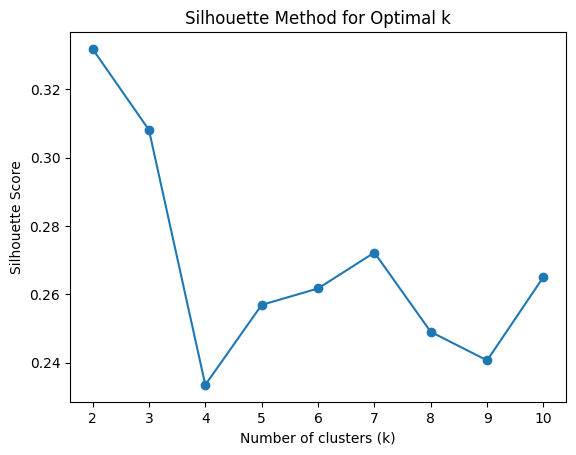

In [394]:
sil_scores = []
k_values = range(2, 11)  # silhouette score needs minimum 2 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, cluster_labels)
    sil_scores.append(sil)

# Plot silhouette scores
plt.plot(k_values, sil_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

108

Markets in Cluster 0:
['Abra', 'Agusan del Norte', 'Agusan del Sur', 'Aklan', 'Albay', 'Antique', 'Apayao', 'Aurora', 'Baguio City', 'Bataan', 'Batangas City', 'Benguet', 'Bukidnon', 'Bulacan', 'Butuan City', 'Cabanatuan City', 'Cagayan', 'Cagayan de Oro City', 'Calapan City', 'Camarines Norte', 'Capiz', 'Catanduanes', 'Catarman', 'Cavite', 'Cebu City', 'Cotabato', 'Cotabato City', 'Davao Oriental', 'Davao de Oro', 'Davao del Norte', 'Davao del Sur', 'Eastern Samar', 'Ifugao', 'Ilocos Norte', 'Ilocos Sur', 'Iloilo', 'Isabela', 'Kidapawan City', 'Koronadal', 'La Trinidad', 'La Union (Ilocos Region)', 'Lanao del Norte', 'Legazpi City', 'Lingayen', 'Marinduque', 'Metro Manila', 'Misamis Occidental', 'Naga City', 'Northern Samar', 'Nueva Ecija', 'Nueva Vizcaya', 'Occidental Mindoro', 'Oriental Mindoro', 'Palawan', 'Palayan', 'Pangasinan', 'Puerto Princesa', 'Quezon', 'Quirino', 'Rizal', 'San Fernando City', 'Santa Cruz', 'Sarangani', 'Shariff Aguak', 'Sorsogon', 'South Cotabato', 'Sul

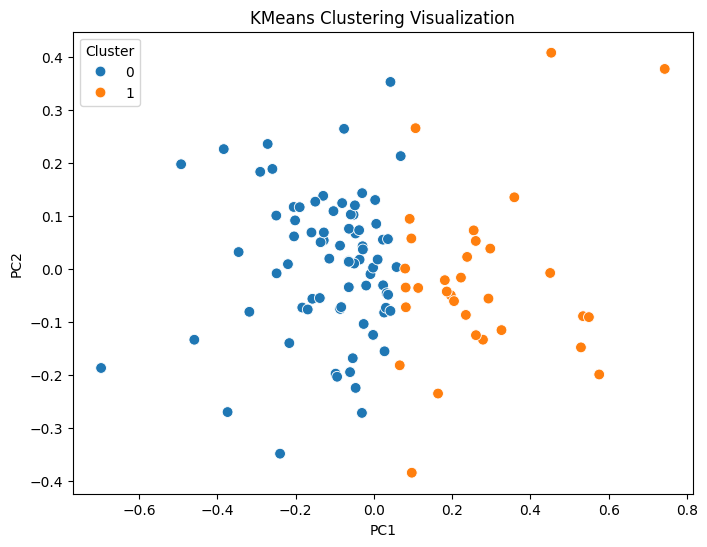

In [395]:
model = KMeans(n_clusters=2, random_state=0, n_init='auto')
labels = model.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

import pandas as pd
df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_plot['Cluster'] = labels
df_plot['Market'] = markets.values 


print(len(markets))

for cluster_id in sorted(df_plot['Cluster'].unique()):
    print(f"\nMarkets in Cluster {cluster_id}:")
    print(df_plot[df_plot['Cluster'] == cluster_id]['Market'].tolist())
    
    
# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=60)
plt.title('KMeans Clustering Visualization')
plt.show()


C:\Users\PREDATOR\AppData\Local\Temp\ipykernel_25556\1314649350.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(volatility_data['admin1'], rotation=45, ha='right')


Top 10 Most Volatile Regions by CV:
                                  admin1        cv  mean_price
11                            Region VII  0.293668   49.231232
0   Autonomous region in Muslim Mindanao  0.201480   51.257700
10                             Region VI  0.190329   46.149963
7                            Region IV-B  0.181353   46.426412
5                             Region III  0.178721   46.812312
4                              Region II  0.172629   43.360385
2                National Capital region  0.172439   42.012710
3                               Region I  0.172106   45.368715
12                           Region VIII  0.169090   46.891913
9                               Region V  0.168654   46.248909

Seasonal Patterns (Monthly averages across all years):
   month_name       mean        cv
0     January  46.458923  0.194587
1    February  46.590443  0.195137
2       March  46.825636  0.193097
3       April  45.850361  0.191038
4         May  45.451008  0.179096
5    

NameError: name 'annual_pct_change' is not defined

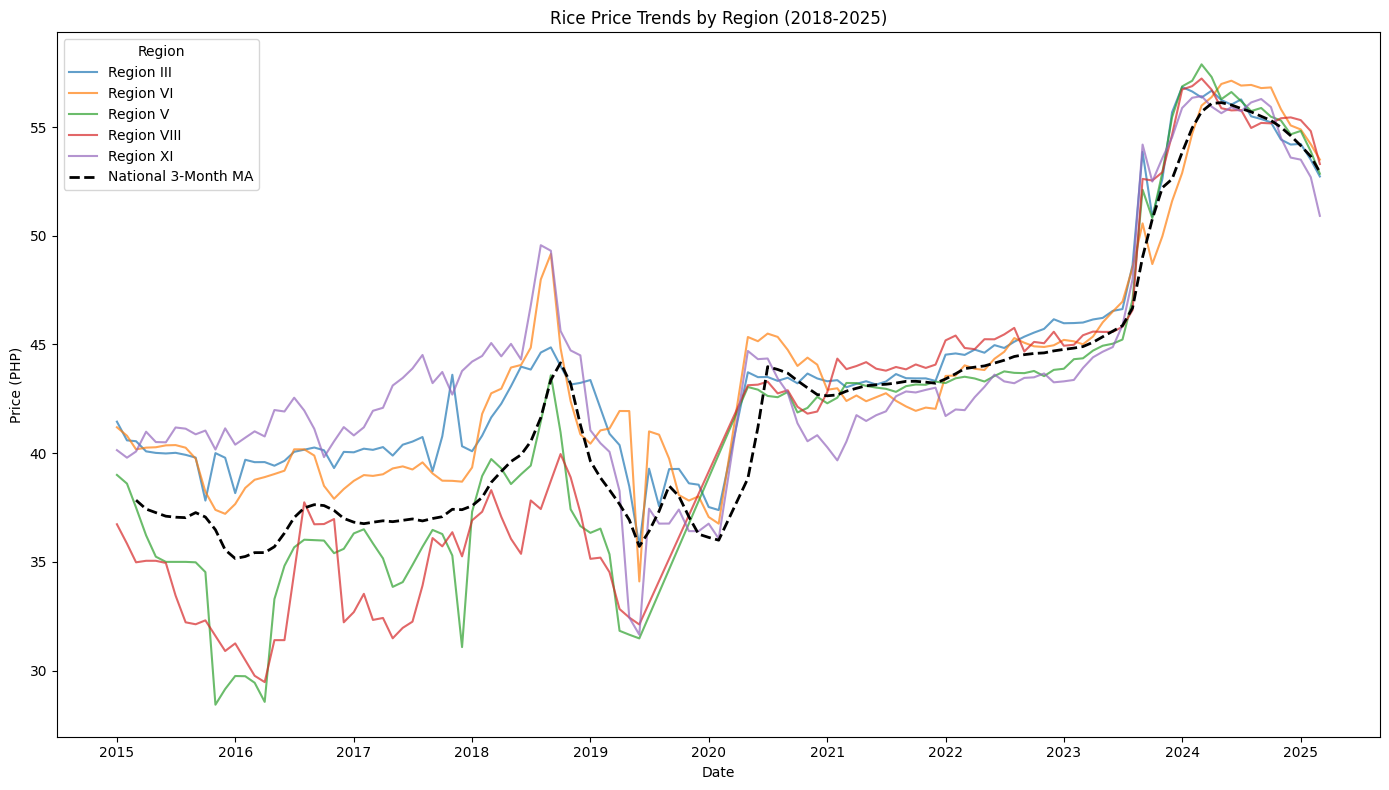

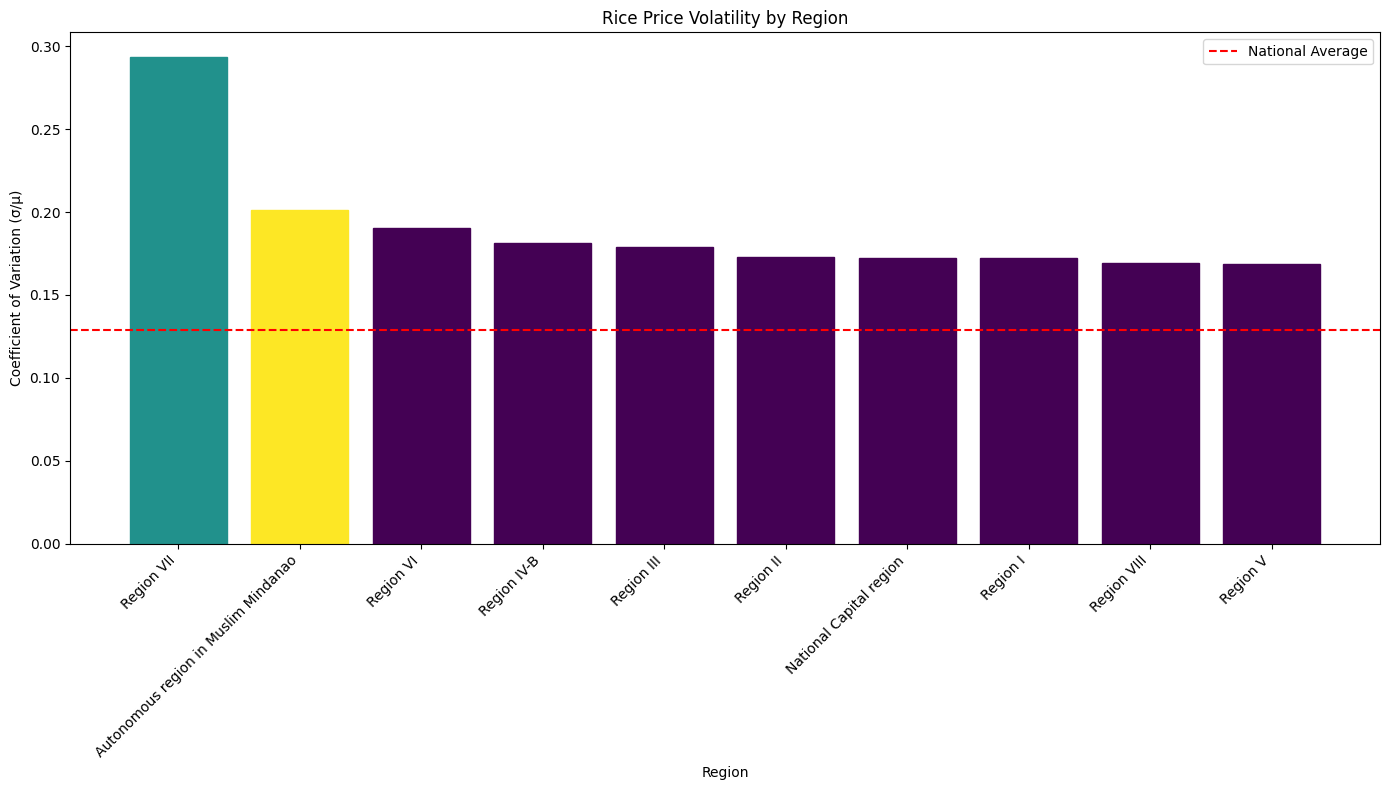

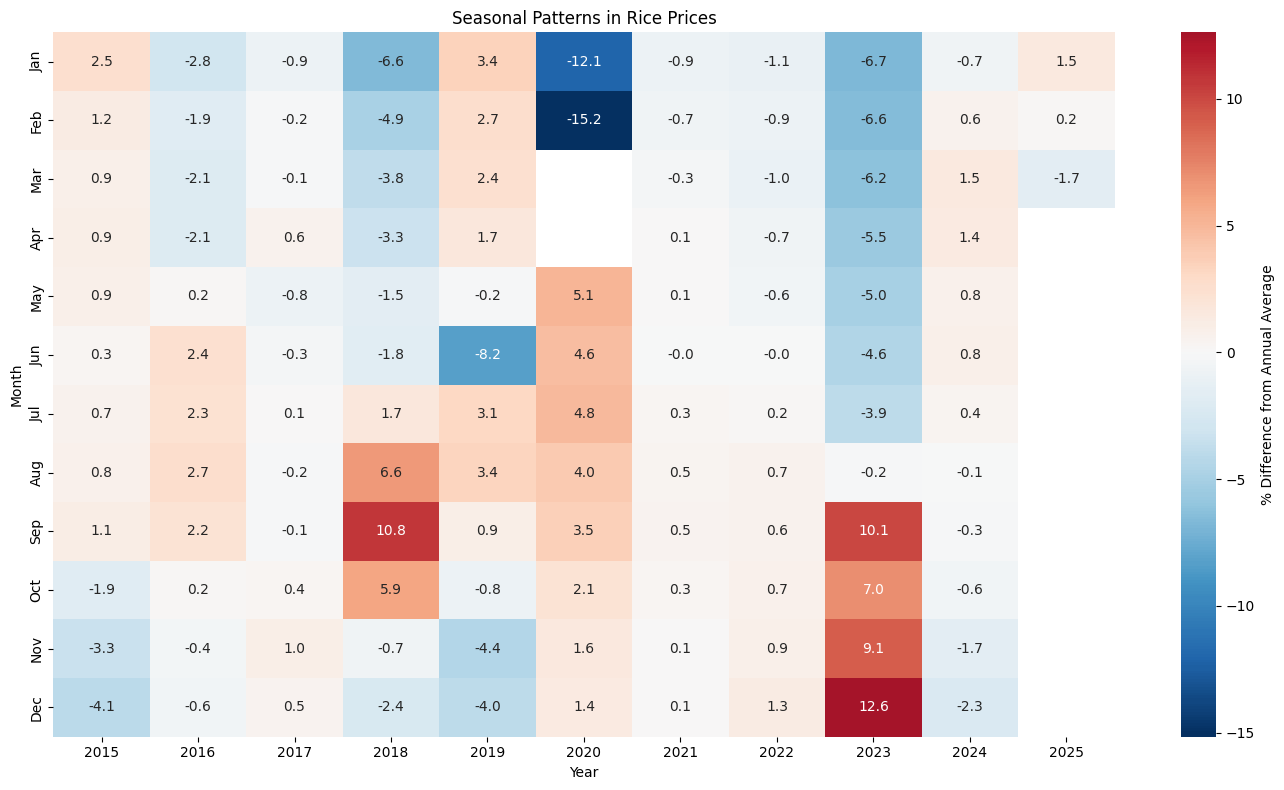

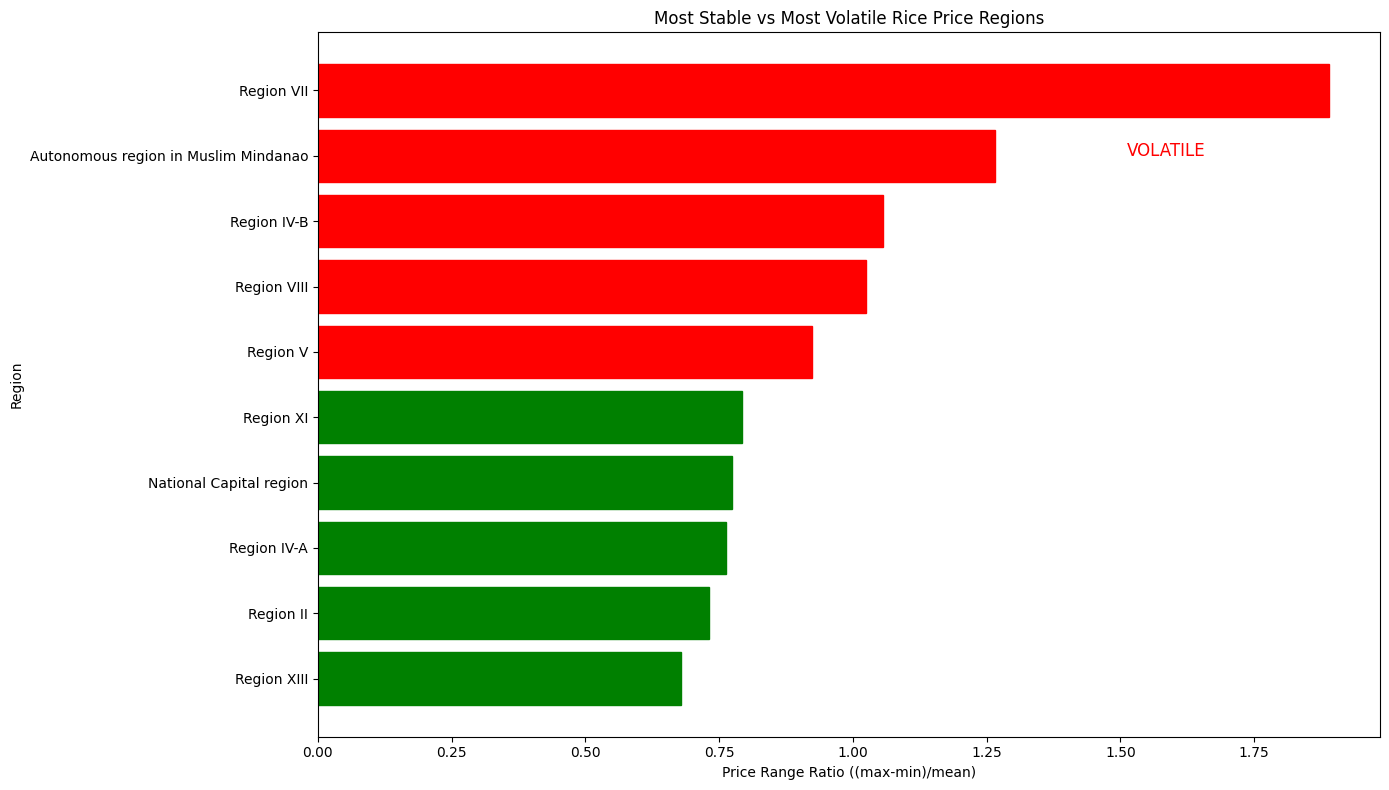

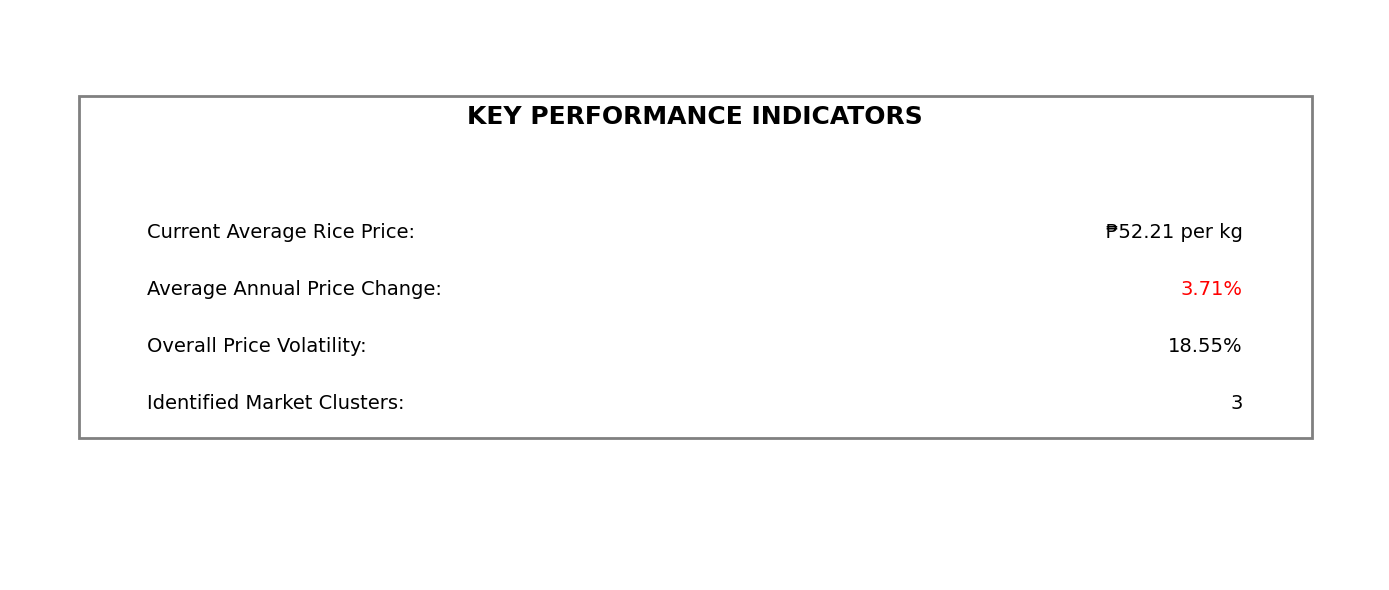

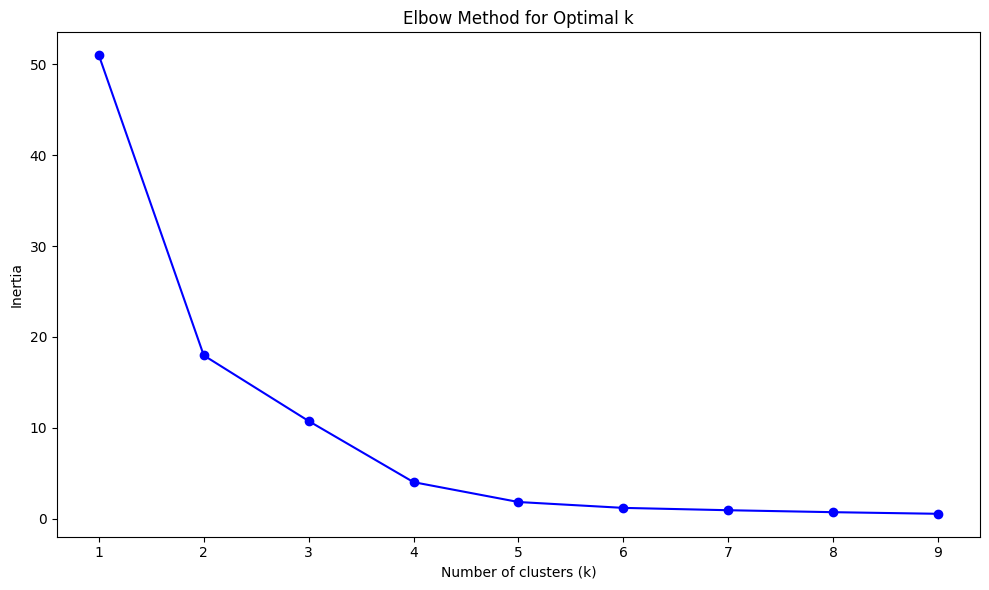

In [396]:
# Run the analysis
generate_analysis_report()

# Display plots interactively
plt.figure(figsize=(14, 8))
plot_time_series()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
plot_volatility_indicators()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
plot_seasonality_heatmap()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
plot_volatile_vs_stable()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
plot_kpis()
plt.tight_layout()
plt.show()